In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# from sklearn.impute import KNNImputer

In [2]:
# pd.set_option("display.max_rows",None)
# pd.set_option("display.max_columns",None)

In [3]:
np.__version__ , pd.__version__

('1.17.4', '0.25.3')

In [4]:
# 家
# data = pd.read_csv('previous_application.csv')
# 學校
data = pd.read_csv('..\\..\\Desktop\\home-credit-default-risk\\previous_application.csv')

In [5]:
data

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
1               607500.0    679671.0               NaN         607500.0   
2               112500.0    136444.5               NaN         112500.0   
3               450000.0    470790.0               NaN         450000.0   
4               337500.0    404055.0               NaN         337500.0   
...                  ...         ...               ...              ...   
1670209         267295.5    311400.0               0.0         267295.5   
1670210          87750.0     64291.5           29250.0          87750.0   
1670211         105237.0    102523.5           10525.5         105237.0   
1670212         180000.0    191880.0               NaN         180000.0   
1670213         360000.0    360000.0               NaN         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  ...  \
0                         SATURDAY                       15  ...   
1                         THURSDAY                       11  ...   
2                          TUESDAY                       11  ...   
3                           MONDAY                        7  ...   
4                         THURSDAY                        9  ...   
...                            ...                      ...  ...   
1670209                  WEDNESDAY                       12  ...   
1670210                    TUESDAY                       15  ...   
1670211                     MONDAY                       12  ...   
1670212                  WEDNESDAY                        9  ...   
1670213                     SUNDAY                       10  ...   

         NAME_SELLER_INDUSTRY  CNT_PAYMENT  NAME_YIELD_GROUP  \
0                Connectivity         12.0            middle   
1                         XNA         36.0        low_action   
2                         XNA         12.0              high   
3                         XNA         12.0            middle   
4                         XNA         24.0              high   
...                       ...          ...               ...   
1670209             Furniture         30.0        low_normal   
1670210             Furniture         12.0            middle   
1670211  Consumer electronics         10.0        low_normal   
1670212                   XNA         12.0        low_normal   
1670213                   XNA         48.0            middle   

                 PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
0           POS mobile with interest            365243.0          -42.0   
1                   Cash X-Sell: low            365243.0         -134.0   
2                  Cash X-Sell: high            365243.0         -271.0   
3                Cash X-Sell: middle            365243.0         -482.0   
4                  Cash Street: high                 NaN            NaN   
...                              ...                 ...            ...   
1670209   POS industry with interest            365243.0         -508.0   
1670210   POS industry with interest            365243.0        -1604.0   
1670211  POS household with interest      

In [6]:
# 缺失值

pd.set_option('display.max_rows', None)

miss_value_percent = data.isnull().sum().sort_values(ascending=False)/len(data)
miss_value_percent = (miss_value_percent * 100).round(decimals=2)

miss_value_count = data.isnull().sum().sort_values(ascending=False)
miss_value =pd.DataFrame( {'count':miss_value_count ,'precent': miss_value_percent} )

print("空值共有 " + str(miss_value_count[miss_value_count>0].count()) + " 個欄位")
print(miss_value[miss_value_count>0])

空值共有 16 個欄位
                             count  precent
RATE_INTEREST_PRIVILEGED   1664263    99.64
RATE_INTEREST_PRIMARY      1664263    99.64
RATE_DOWN_PAYMENT           895844    53.64
AMT_DOWN_PAYMENT            895844    53.64
NAME_TYPE_SUITE             820405    49.12
DAYS_TERMINATION            673065    40.30
NFLAG_INSURED_ON_APPROVAL   673065    40.30
DAYS_FIRST_DRAWING          673065    40.30
DAYS_FIRST_DUE              673065    40.30
DAYS_LAST_DUE_1ST_VERSION   673065    40.30
DAYS_LAST_DUE               673065    40.30
AMT_GOODS_PRICE             385515    23.08
AMT_ANNUITY                 372235    22.29
CNT_PAYMENT                 372230    22.29
PRODUCT_COMBINATION            346     0.02
AMT_CREDIT                       1     0.00


In [7]:
pd.DataFrame(data.dtypes).reset_index()

index        0
0                    SK_ID_PREV    int64
1                    SK_ID_CURR    int64
2            NAME_CONTRACT_TYPE   object
3                   AMT_ANNUITY  float64
4               AMT_APPLICATION  float64
5                    AMT_CREDIT  float64
6              AMT_DOWN_PAYMENT  float64
7               AMT_GOODS_PRICE  float64
8    WEEKDAY_APPR_PROCESS_START   object
9       HOUR_APPR_PROCESS_START    int64
10  FLAG_LAST_APPL_PER_CONTRACT   object
11       NFLAG_LAST_APPL_IN_DAY    int64
12            RATE_DOWN_PAYMENT  float64
13        RATE_INTEREST_PRIMARY  float64
14     RATE_INTEREST_PRIVILEGED  float64
15       NAME_CASH_LOAN_PURPOSE   object
16         NAME_CONTRACT_STATUS   object
17                DAYS_DECISION    int64
18            NAME_PAYMENT_TYPE   object
19           CODE_REJECT_REASON   object
20              NAME_TYPE_SUITE   object
21             NAME_CLIENT_TYPE   object
22          NAME_GOODS_CATEGORY   object
23               NAME_PORTFOLIO   object
24            NAME_PRODUCT_TYPE   object
25                 CHANNEL_TYPE   object
26             SELLERPLACE_AREA    int64
27         NAME_SELLER_INDUSTRY   object
28                  CNT_PAYMENT  float64
29             NAME_YIELD_GROUP   object
30          PRODUCT_COMBINATION   object
31           DAYS_FIRST_DRAWING  float64
32               DAYS_FIRST_DUE  float64
33    DAYS_LAST_DUE_1ST_VERSION  float64
34                DAYS_LAST_DUE  float64
35             DAYS_TERMINATION  float64
36    NFLAG_INSURED_ON_APPROVAL  float64

<h1>資料分佈

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64


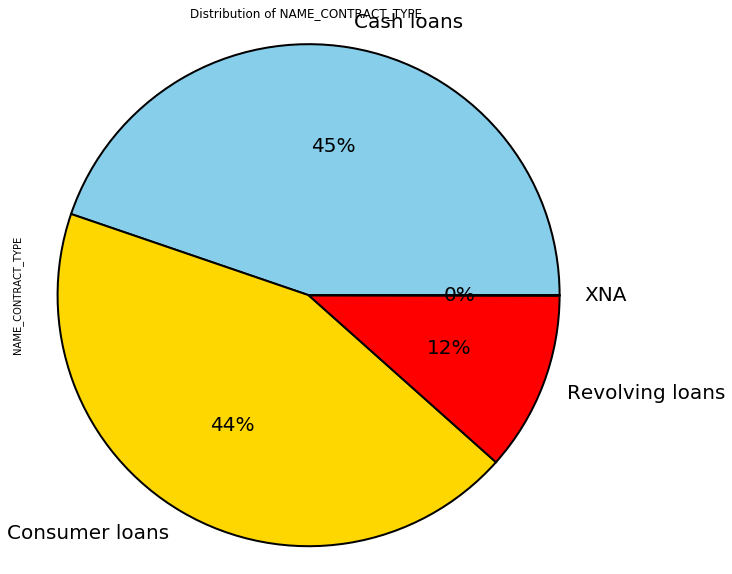

TUESDAY      255118
WEDNESDAY    255010
MONDAY       253557
FRIDAY       252048
THURSDAY     249099
SATURDAY     240631
SUNDAY       164751
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64


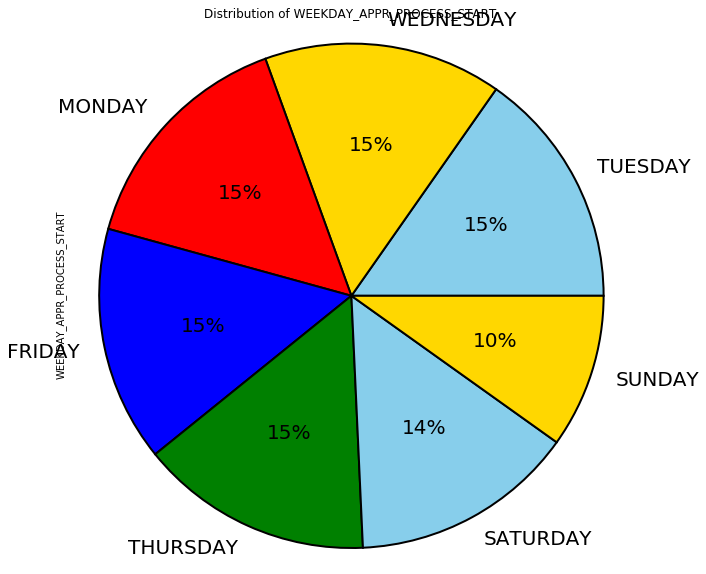

Y    1661739
N       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64


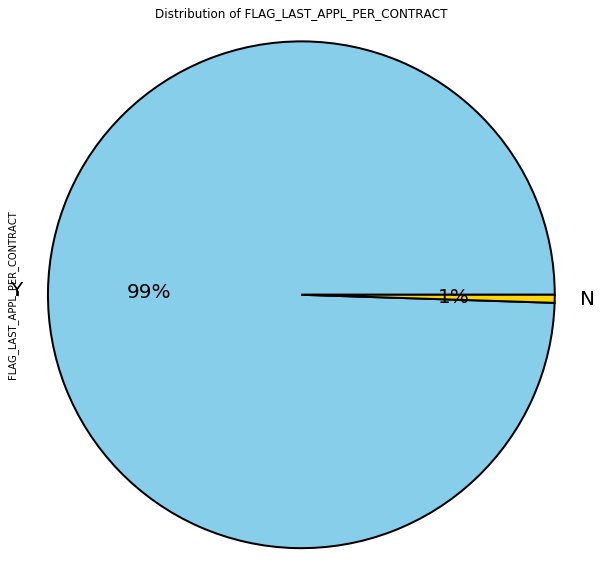

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

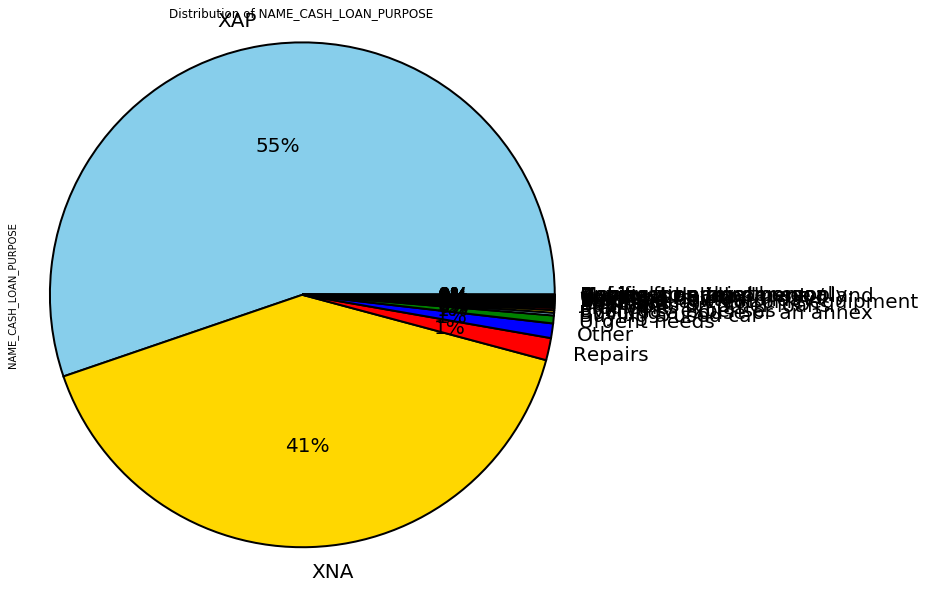

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64


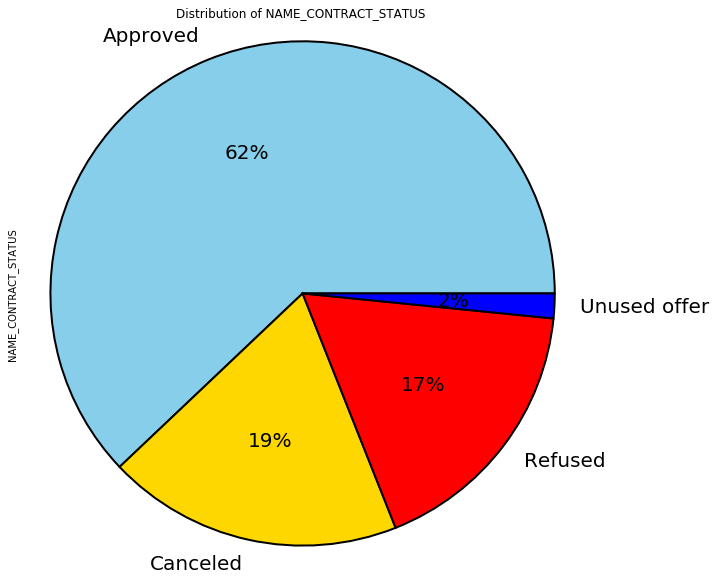

Cash through the bank                        1033552
XNA                                           627384
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64


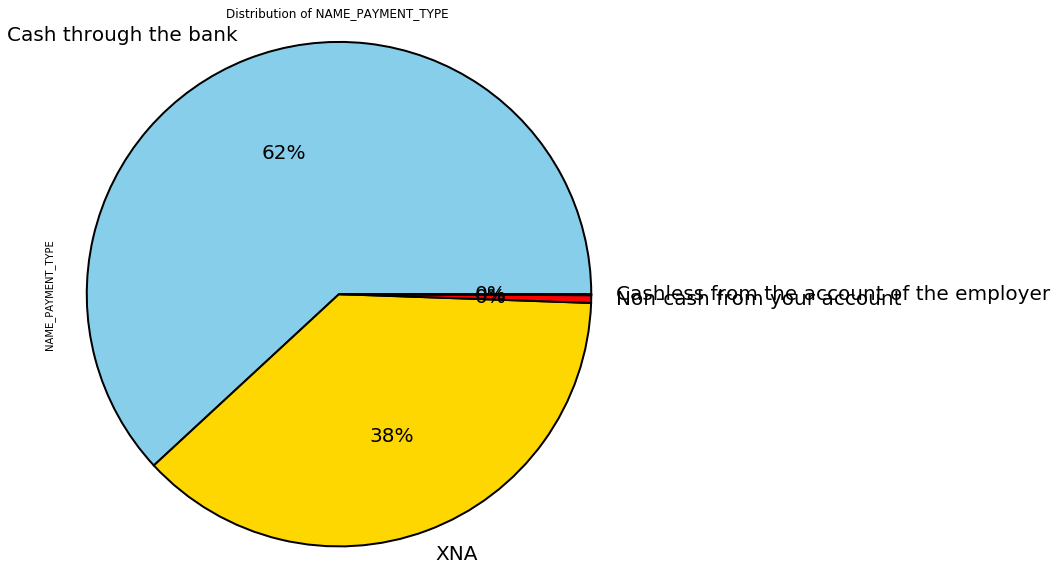

XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64


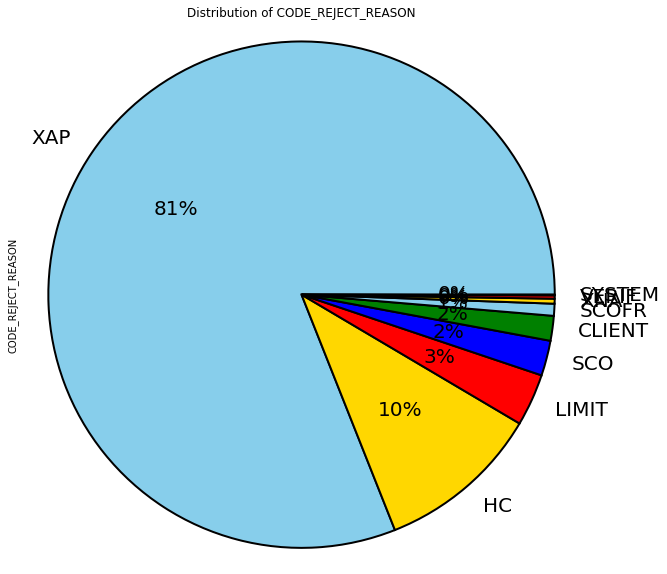

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64


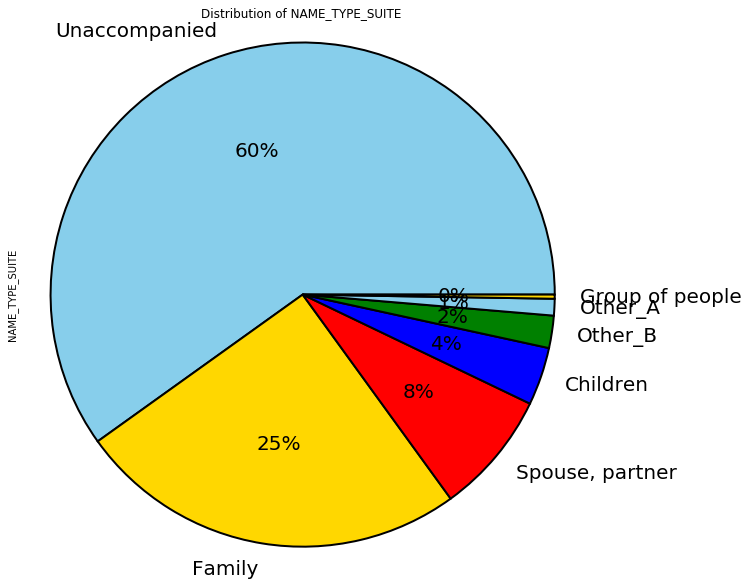

Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64


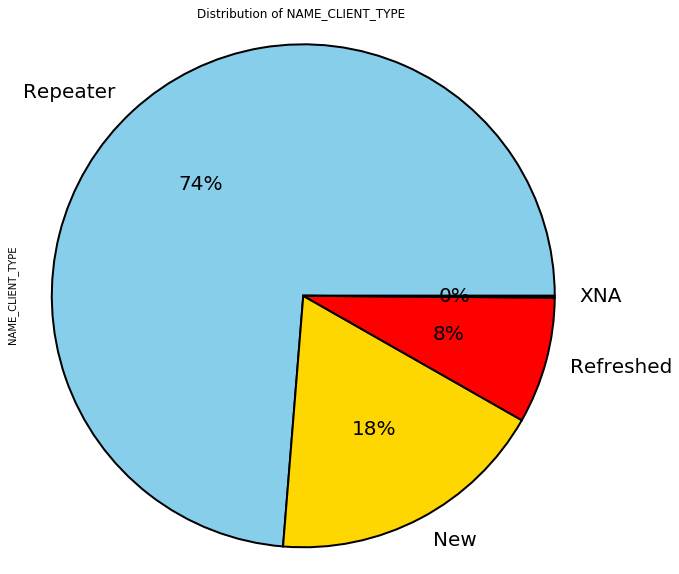

XNA                         950809
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1550
Direct Sales                   446
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
House Construction               1
Animals                          1
Name: NAME_GOODS_CAT

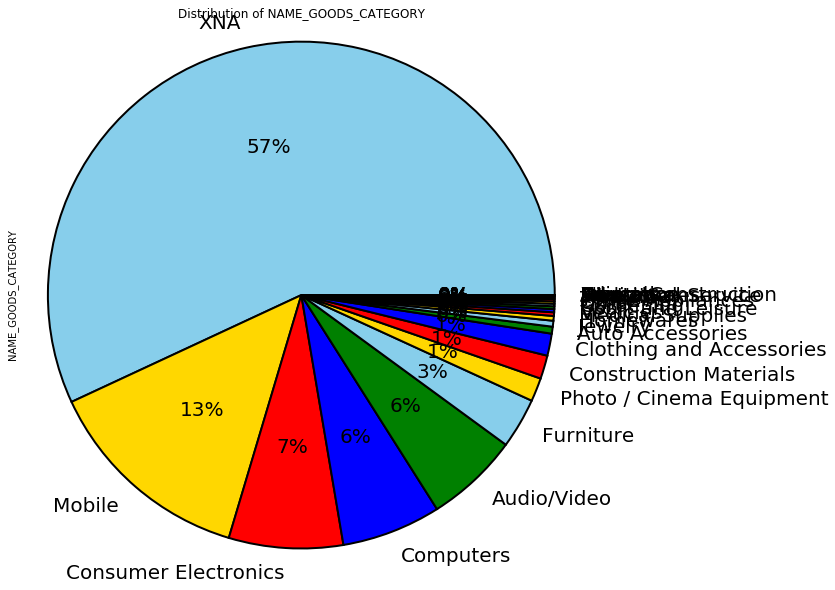

POS      691011
Cash     461563
XNA      372230
Cards    144985
Cars        425
Name: NAME_PORTFOLIO, dtype: int64


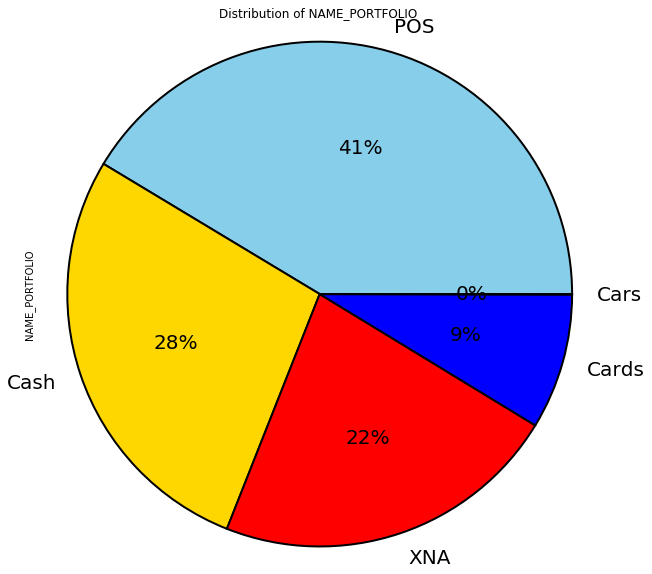

XNA        1063666
x-sell      456287
walk-in     150261
Name: NAME_PRODUCT_TYPE, dtype: int64


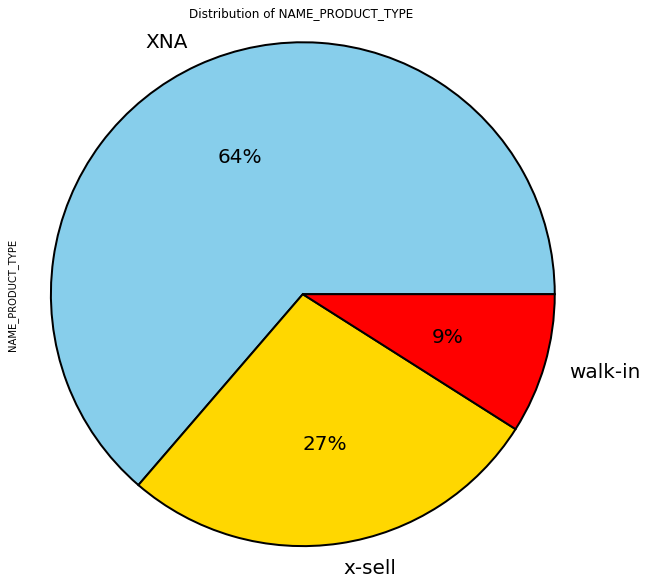

Credit and cash offices       719968
Country-wide                  494690
Stone                         212083
Regional / Local              108528
Contact center                 71297
AP+ (Cash loan)                57046
Channel of corporate sales      6150
Car dealer                       452
Name: CHANNEL_TYPE, dtype: int64


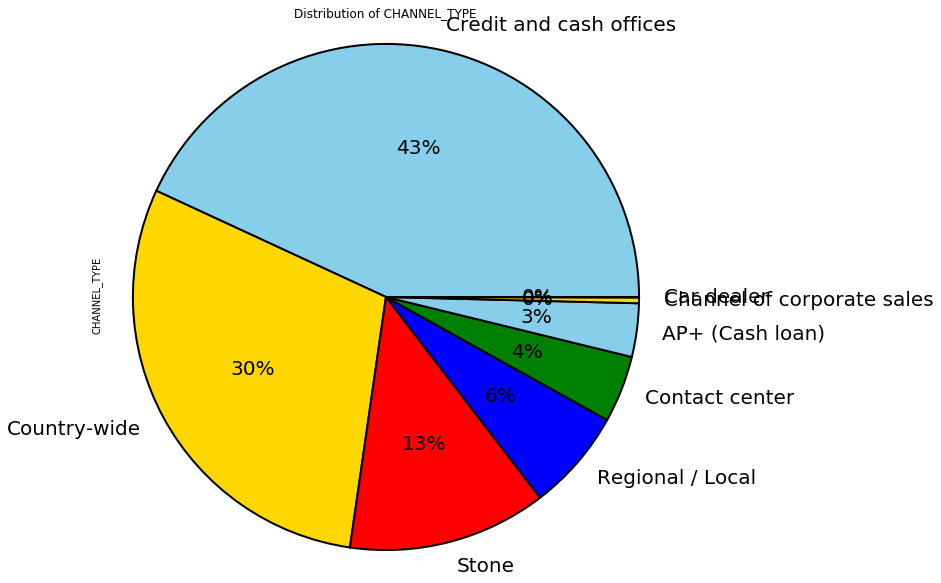

XNA                     855720
Consumer electronics    398265
Connectivity            276029
Furniture                57849
Construction             29781
Clothing                 23949
Industry                 19194
Auto technology           4990
Jewelry                   2709
MLM partners              1215
Tourism                    513
Name: NAME_SELLER_INDUSTRY, dtype: int64


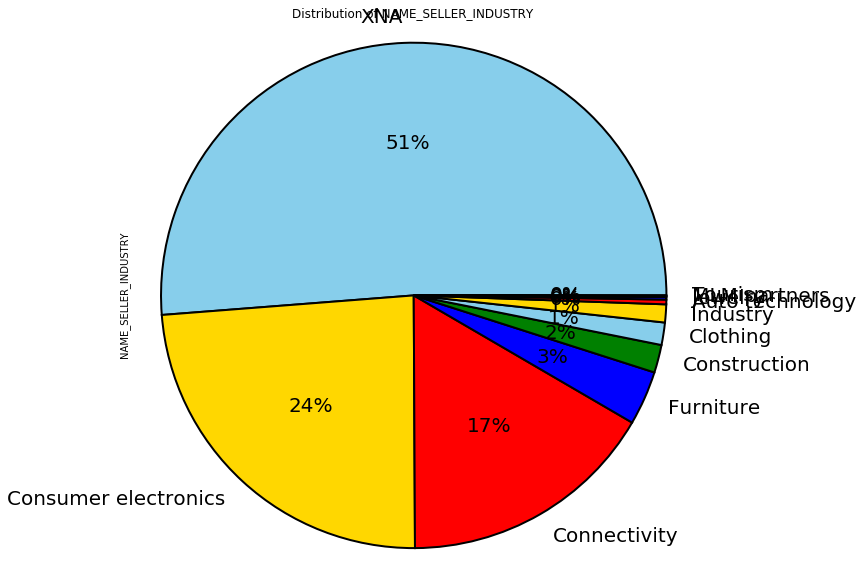

XNA           517215
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: NAME_YIELD_GROUP, dtype: int64


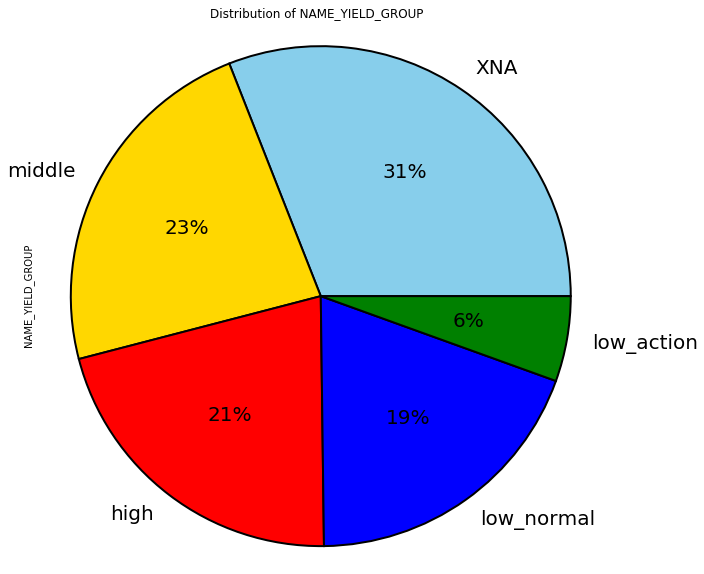

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64


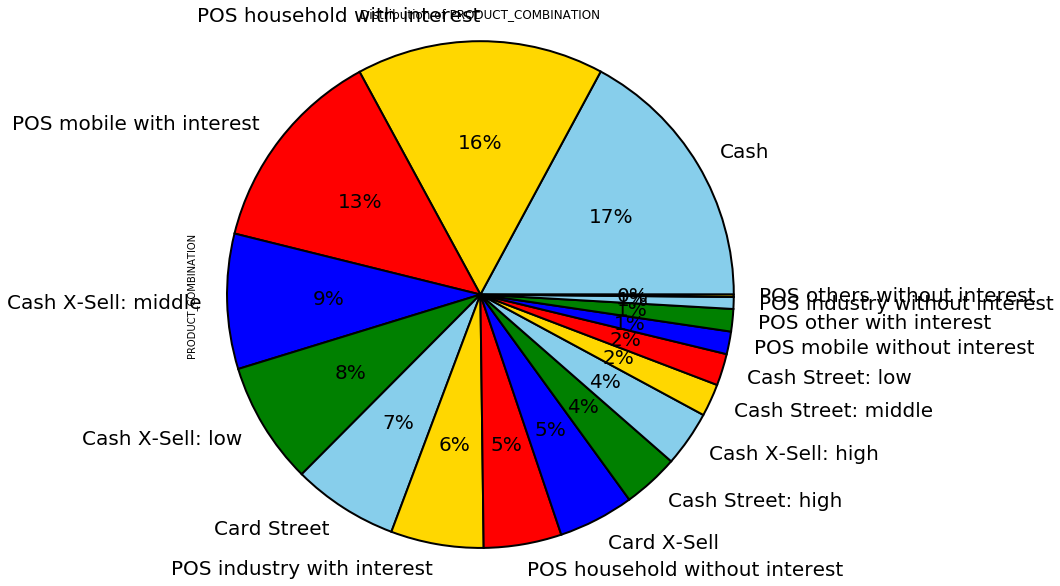

In [10]:
# object分類
data_object = list(data.columns[data.dtypes=="object"])
data_object_count = len(data_object)

for name in data_object: 
    print(data[name].value_counts())
    plt.figure(figsize=(10,10))
    data[name].value_counts().plot.pie(autopct = "%0.f%%",colors = ["skyblue","gold","r","b","g"],
                                                  wedgeprops={"linewidth":2,"edgecolor":"k"},textprops = {'fontsize':20, 'color':'k'},)
    plt.axis('equal')
    plt.title("Distribution of " + name )
    plt.show()

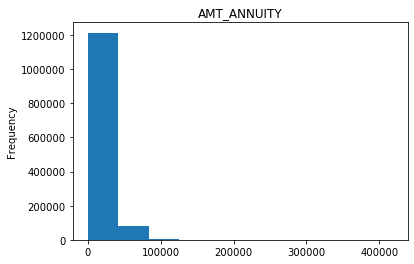

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64



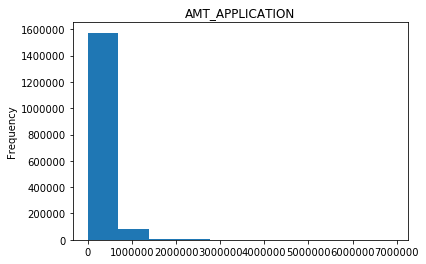

count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64



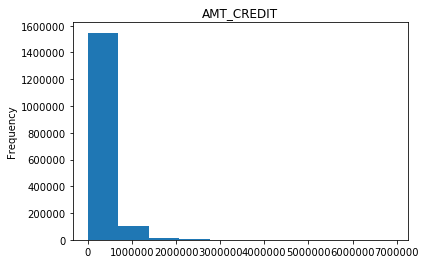

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64



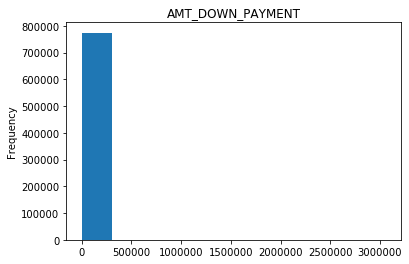

count    7.743700e+05
mean     6.697402e+03
std      2.092150e+04
min     -9.000000e-01
25%      0.000000e+00
50%      1.638000e+03
75%      7.740000e+03
max      3.060045e+06
Name: AMT_DOWN_PAYMENT, dtype: float64



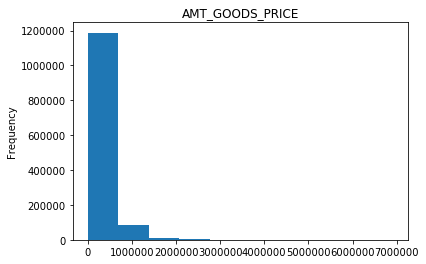

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64



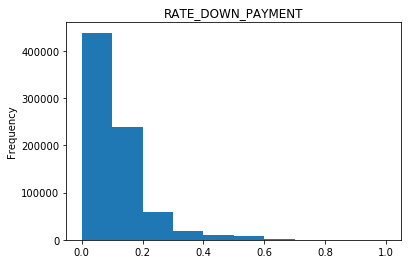

count    774370.000000
mean          0.079637
std           0.107823
min          -0.000015
25%           0.000000
50%           0.051605
75%           0.108909
max           1.000000
Name: RATE_DOWN_PAYMENT, dtype: float64



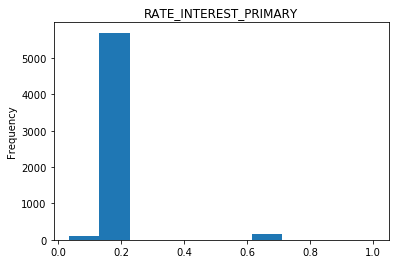

count    5951.000000
mean        0.188357
std         0.087671
min         0.034781
25%         0.160716
50%         0.189122
75%         0.193330
max         1.000000
Name: RATE_INTEREST_PRIMARY, dtype: float64



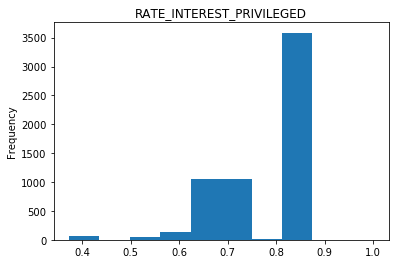

count    5951.000000
mean        0.773503
std         0.100879
min         0.373150
25%         0.715645
50%         0.835095
75%         0.852537
max         1.000000
Name: RATE_INTEREST_PRIVILEGED, dtype: float64



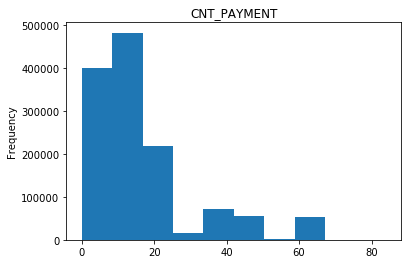

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64



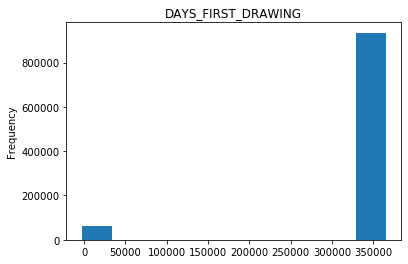

count    997149.000000
mean     342209.855039
std       88916.115833
min       -2922.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64



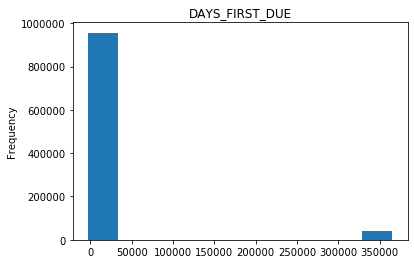

count    997149.000000
mean      13826.269337
std       72444.869708
min       -2892.000000
25%       -1628.000000
50%        -831.000000
75%        -411.000000
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64



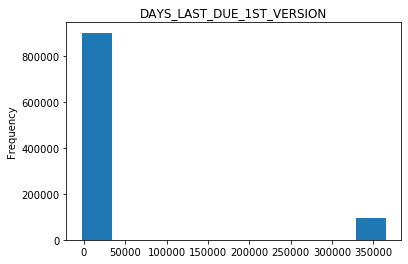

count    997149.000000
mean      33767.774054
std      106857.034789
min       -2801.000000
25%       -1242.000000
50%        -361.000000
75%         129.000000
max      365243.000000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64



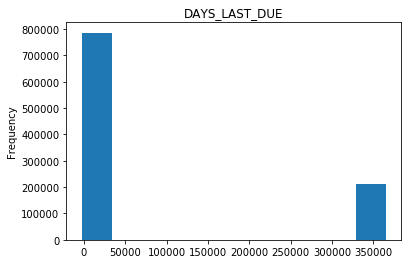

count    997149.000000
mean      76582.403064
std      149647.415123
min       -2889.000000
25%       -1314.000000
50%        -537.000000
75%         -74.000000
max      365243.000000
Name: DAYS_LAST_DUE, dtype: float64



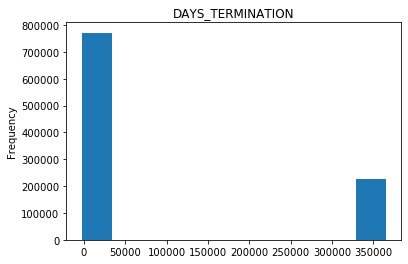

count    997149.000000
mean      81992.343838
std      153303.516729
min       -2874.000000
25%       -1270.000000
50%        -499.000000
75%         -44.000000
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64



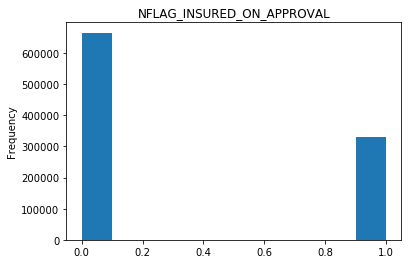

count    997149.000000
mean          0.332570
std           0.471134
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64



In [11]:
# float64分類
data_float64 = list(data.columns[data.dtypes=="float64"])

for name in data_float64: 
    data[name].plot.hist()
    plt.title(name)
    plt.show()
    print(data[name].describe())
    print()

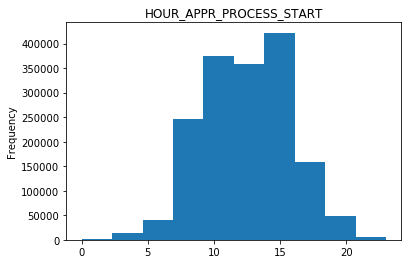

count    1.670214e+06
mean     1.248418e+01
std      3.334028e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.500000e+01
max      2.300000e+01
Name: HOUR_APPR_PROCESS_START, dtype: float64



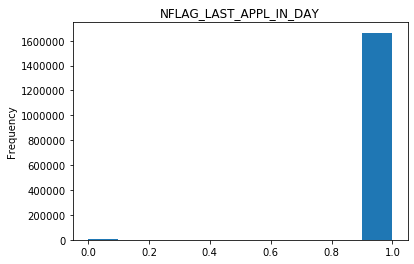

count    1.670214e+06
mean     9.964675e-01
std      5.932963e-02
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: NFLAG_LAST_APPL_IN_DAY, dtype: float64



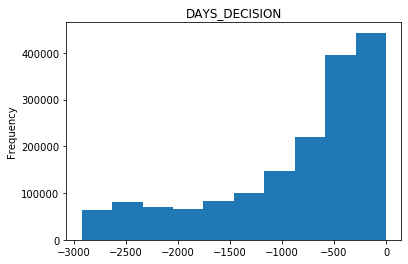

count    1.670214e+06
mean    -8.806797e+02
std      7.790997e+02
min     -2.922000e+03
25%     -1.300000e+03
50%     -5.810000e+02
75%     -2.800000e+02
max     -1.000000e+00
Name: DAYS_DECISION, dtype: float64



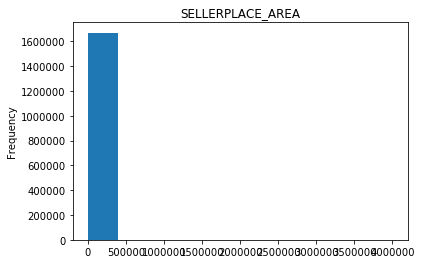

count    1.670214e+06
mean     3.139511e+02
std      7.127443e+03
min     -1.000000e+00
25%     -1.000000e+00
50%      3.000000e+00
75%      8.200000e+01
max      4.000000e+06
Name: SELLERPLACE_AREA, dtype: float64



In [12]:
# int64分類
data_int64 = list(data.columns[data.dtypes=="int64"])

for name in data_int64:
    if name in ['SK_ID_PREV', 'SK_ID_CURR']:
        continue
    data[name].plot.hist()
    plt.title(name)
    plt.show()
    print(data[name].describe())
    print()

<h1>去除異常值

In [8]:
# 確認異常值
data_float64 = list(data.columns[data.dtypes=="float64"])
data_float64_count = len(data_float64)
aa = pd.DataFrame()
for name in data_float64:
    data_is_na = data[data[name].isnull()].count()[0]
    data_is_0 = data[data[name]==0].count()[0]
    pad = pd.DataFrame({"Na":data_is_na,"0":data_is_0},index=[name])
    aa = pd.concat([aa,pad],axis=0)
aa

Na       0
AMT_ANNUITY                 372235    1637
AMT_APPLICATION                  0  392402
AMT_CREDIT                       1  336768
AMT_DOWN_PAYMENT            895844  369854
AMT_GOODS_PRICE             385515    6869
RATE_DOWN_PAYMENT           895844  369854
RATE_INTEREST_PRIMARY      1664263       0
RATE_INTEREST_PRIVILEGED   1664263       0
CNT_PAYMENT                 372230  144985
DAYS_FIRST_DRAWING          673065       0
DAYS_FIRST_DUE              673065       0
DAYS_LAST_DUE_1ST_VERSION   673065     705
DAYS_LAST_DUE               673065       0
DAYS_TERMINATION            673065       0
NFLAG_INSURED_ON_APPROVAL   673065  665527

In [9]:
# 時間異常值，另外新增欄位
issue_data = list(data.columns[31:-1])
for name in issue_data:    
#     rename = name + "_ANOM"
#     data[rename] = data[name] == 365243
    data[name].replace({365243: np.nan}, inplace = True)

In [15]:
# # 將缺失值跟是0和大於60%的欄位去除

# for name in data: 
#     delect = (data[data[name]==0].count()[0]+data[name].isnull().sum())/len(data)
#     if delect > 0.60:
#         data = data.drop(columns=name)

In [11]:
# 將缺失值大於60的欄位去除

miss_value_percent = data.isnull().sum().sort_values(ascending=False)/len(data)
miss_value_percent = (miss_value_percent * 100).round(decimals=2)

if (miss_value_percent>60).any():
    delect_colomns = list(miss_value_percent[miss_value_percent>60].index)
    for n in delect_colomns:
        data = data.drop(columns=n)

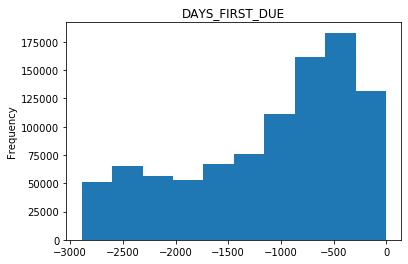

count    956504.000000
mean      -1106.583027
std         790.703113
min       -2892.000000
25%       -1676.000000
50%        -874.000000
75%        -459.000000
max          -2.000000
Name: DAYS_FIRST_DUE, dtype: float64



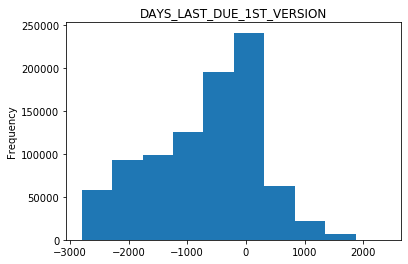

count    903285.000000
mean       -677.158175
std         923.601152
min       -2801.000000
25%       -1359.000000
50%        -480.000000
75%          -2.000000
max        2389.000000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64



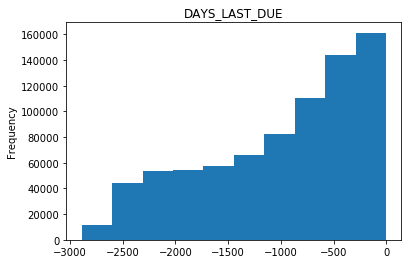

count    785928.000000
mean       -996.179128
std         752.703178
min       -2889.000000
25%       -1566.000000
50%        -801.000000
75%        -353.000000
max          -2.000000
Name: DAYS_LAST_DUE, dtype: float64



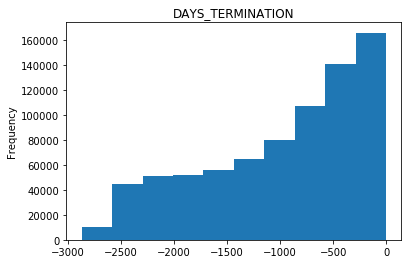

count    771236.000000
mean       -978.375222
std         749.134297
min       -2874.000000
25%       -1539.000000
50%        -780.000000
75%        -337.000000
max          -2.000000
Name: DAYS_TERMINATION, dtype: float64



Na       0
AMT_ANNUITY                372235    1637
AMT_APPLICATION                 0  392402
AMT_CREDIT                      1  336768
AMT_DOWN_PAYMENT           895844  369854
AMT_GOODS_PRICE            385515    6869
RATE_DOWN_PAYMENT          895844  369854
CNT_PAYMENT                372230  144985
DAYS_FIRST_DUE             713710       0
DAYS_LAST_DUE_1ST_VERSION  766929     705
DAYS_LAST_DUE              884286       0
DAYS_TERMINATION           898978       0
NFLAG_INSURED_ON_APPROVAL  673065  665527

In [17]:
# 去掉異常值後
data_float64 = list(data.columns[data.dtypes=="float64"])
data_float64_count = len(data_float64)
aa = pd.DataFrame()
for name in data_float64:
    data_is_na = data[data[name].isnull()].count()[0]
    data_is_0 = data[data[name]==0].count()[0]
    pad = pd.DataFrame({"Na":data_is_na,"0":data_is_0},index=[name])
    aa = pd.concat([aa,pad],axis=0)


for name in issue_data[1:]: 
    data[name].plot.hist()
    plt.title(name)
    plt.show()
    print(data[name].describe())
    print()
aa

<h1>填補空值

In [12]:
# 將object為空值改為X，不新增欄位
data_object = list(data.columns[data.dtypes=="object"])
data_object_count = len(data_object)

for name in data_object:
#     rename = name + "_ANOM"
#     if (data[name].isnull()>0).any():      
#         data[rename] = data[name].isnull()
    data[name].replace({np.nan: 'NA'}, inplace = True)
    
# # 將float64為空值改為0新增欄位
# data_float64 = list(data.columns[data.dtypes=="float64"])
# data_float64_count = len(data_float64)

# for name in data_float64:
#     rename = name + "_ANOM"
#     if (data[name].isnull()>0).any():      
#         data[rename] = data[name].isnull()
#     data[name].replace({np.nan: 0}, inplace = True)
    
# AMT_CREDIT空值只有一個直接補0
data['AMT_CREDIT'].replace({np.nan: 0}, inplace = True)


In [13]:
# 缺失值

pd.set_option('display.max_rows', None)

miss_value_percent = data.isnull().sum().sort_values(ascending=False)/len(data)
miss_value_percent = (miss_value_percent * 100).round(decimals=2)

miss_value_count = data.isnull().sum().sort_values(ascending=False)
miss_value =pd.DataFrame( {'count':miss_value_count ,'precent': miss_value_percent} )

print("空值共有 " + str(miss_value_count[miss_value_count>0].count()) + " 個欄位")
print(miss_value[miss_value_count>0])

空值共有 10 個欄位
                            count  precent
DAYS_TERMINATION           898978    53.82
RATE_DOWN_PAYMENT          895844    53.64
AMT_DOWN_PAYMENT           895844    53.64
DAYS_LAST_DUE              884286    52.94
DAYS_LAST_DUE_1ST_VERSION  766929    45.92
DAYS_FIRST_DUE             713710    42.73
NFLAG_INSURED_ON_APPROVAL  673065    40.30
AMT_GOODS_PRICE            385515    23.08
AMT_ANNUITY                372235    22.29
CNT_PAYMENT                372230    22.29


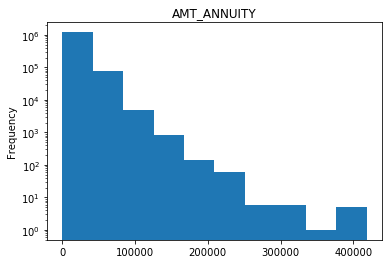

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64



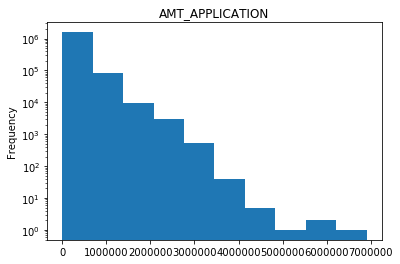

count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64



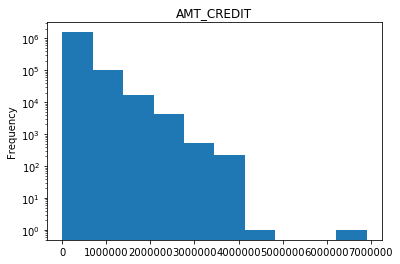

count    1.670214e+06
mean     1.961139e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64



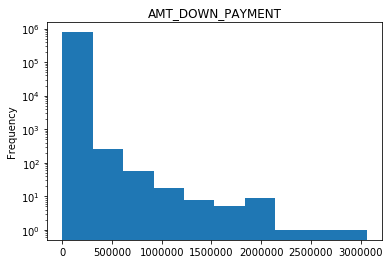

count    7.743700e+05
mean     6.697402e+03
std      2.092150e+04
min     -9.000000e-01
25%      0.000000e+00
50%      1.638000e+03
75%      7.740000e+03
max      3.060045e+06
Name: AMT_DOWN_PAYMENT, dtype: float64



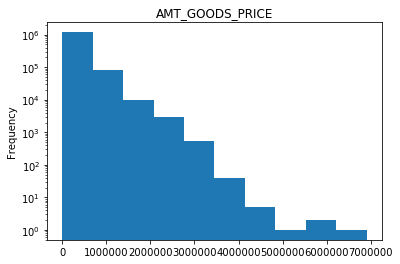

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64



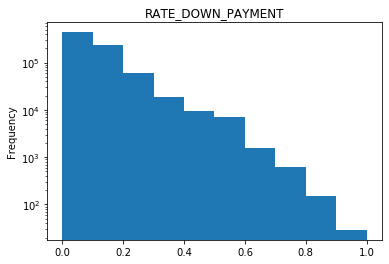

count    774370.000000
mean          0.079637
std           0.107823
min          -0.000015
25%           0.000000
50%           0.051605
75%           0.108909
max           1.000000
Name: RATE_DOWN_PAYMENT, dtype: float64



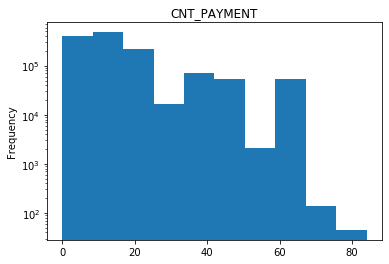

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64



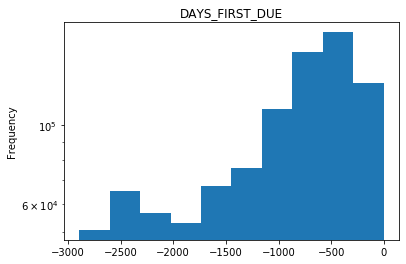

count    956504.000000
mean      -1106.583027
std         790.703113
min       -2892.000000
25%       -1676.000000
50%        -874.000000
75%        -459.000000
max          -2.000000
Name: DAYS_FIRST_DUE, dtype: float64



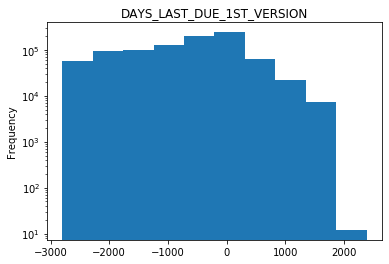

count    903285.000000
mean       -677.158175
std         923.601152
min       -2801.000000
25%       -1359.000000
50%        -480.000000
75%          -2.000000
max        2389.000000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64



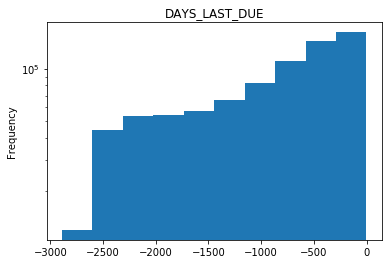

count    785928.000000
mean       -996.179128
std         752.703178
min       -2889.000000
25%       -1566.000000
50%        -801.000000
75%        -353.000000
max          -2.000000
Name: DAYS_LAST_DUE, dtype: float64



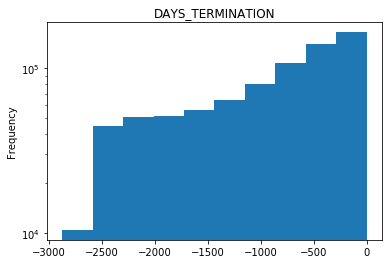

count    771236.000000
mean       -978.375222
std         749.134297
min       -2874.000000
25%       -1539.000000
50%        -780.000000
75%        -337.000000
max          -2.000000
Name: DAYS_TERMINATION, dtype: float64



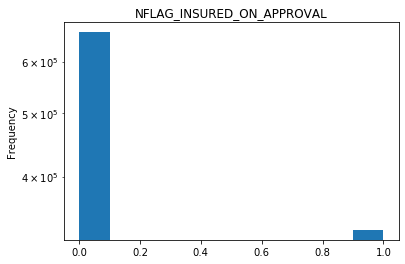

count    997149.000000
mean          0.332570
std           0.471134
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64



In [20]:
data_useful = data[data['AMT_GOODS_PRICE']!=0]
data_notuseful = data[data['AMT_GOODS_PRICE'].isnull()]

# float64分類
data_float64 = list(data_useful.columns[data.dtypes=="float64"])

for name in data_float64: 
    data[name].plot.hist(log=True)
    plt.title(name)
    plt.show()
    print(data[name].describe())
    print()

In [100]:
# CNT_PAYMENT 是空值的 AMT_ANNUITY 也是空值

data[data['CNT_PAYMENT'].isnull()].head(200)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
6        2315218      175704         Cash loans          NaN            0.000   
7        1656711      296299         Cash loans          NaN            0.000   
8        2367563      342292         Cash loans          NaN            0.000   
9        2579447      334349         Cash loans          NaN            0.000   
22       1172842      302212         Cash loans          NaN            0.000   
24       1555330      199353         Cash loans          NaN            0.000   
29       1583704      315664         Cash loans          NaN            0.000   
32       1471931      257846         Cash loans          NaN            0.000   
33       1478703      393511         Cash loans          NaN            0.000   
41       1366380      247572     Consumer loans          NaN        17950.500   
48       2600277      256517         Cash loans          NaN            0.000   
50       2261993      299391    Revolving loans          NaN            0.000   
57       2586409      446260         Cash loans          NaN            0.000   
60       2511538      435636         Cash loans          NaN            0.000   
61       1024150      374768         Cash loans          NaN            0.000   
62       2326929      221146    Revolving loans          NaN            0.000   
63       1074341      137179         Cash loans          NaN            0.000   
64       1760015      269239         Cash loans          NaN            0.000   
65       2810623      369919         Cash loans          NaN            0.000   
66       2433280      407487         Cash loans          NaN            0.000   
67       2325707      353086         Cash loans          NaN            0.000   
69       2734980      348760         Cash loans          NaN            0.000   
83       2742815      244966         Cash loans          NaN            0.000   
84       2796269      240839         Cash loans          NaN            0.000   
86       1275378      433914    Revolving loans          NaN            0.000   
90       2443751      210583         Cash loans          NaN            0.000   
91       1524716      273901    Revolving loans          NaN            0.000   
92       2081217      281586    Revolving loans          NaN            0.000   
97       1935914      191576     Consumer loans          NaN        23400.000   
98       1457539      307992     Consumer loans          NaN       113215.500   
100      2289239      444025         Cash loans          NaN            0.000   
102      2603082      223550         Cash loans          NaN            0.000   
104      1826549      141689         Cash loans          NaN            0.000   
106      1655160      255798         Cash loans          NaN            0.000   
107      2743878      178345         Cash loans          NaN            0.000   
108      1015452      272179         Cash loans          NaN            0.000   
111      2603295      217812         Cash loans          NaN            0.000   
112      2086496      434442         Cash loans          NaN            0.000   
113      2577530      427367         Cash loans          NaN            0.000   
114      1168659      101529         Cash loans          NaN            0.000   
115      2686051      101529         Cash loans          NaN            0.000   
116      2640293      264510    Revolving loans          NaN            0.000   
119      1246266      153017         Cash loans          NaN            0.000   
125      2449093      311178         Cash loans          NaN            0.000   
126      1343409      160671         Cash loans          NaN            0.000   
128      1146680      293304         Cash loans          NaN            0.000   
129      2608217      268456         Cash loans          NaN            0.000   
130      2740457      367231         Cash loans          NaN            0.000   
133      2147401      202386         

In [29]:
pd.set_option("display.max_columns",None)
data[data['NAME_PORTFOLIO']=="POS"].head(200)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0       2030495      271877     Consumer loans     1730.430        17145.000   
13      1397919      321676     Consumer loans     7654.860        53779.500   
14      2273188      270658     Consumer loans     9644.220        26550.000   
15      1232483      151612     Consumer loans    21307.455       126490.500   
16      2163253      154602     Consumer loans     4187.340        26955.000   
28      2075578      418383     Consumer loans     7656.705        74610.000   
30      2138466      170289     Consumer loans     3286.485        32562.000   
31      2191093      182450     Consumer loans     9789.255       100485.000   
35      2027074      208000     Consumer loans    12065.535        56655.000   
36      2766278      178375     Consumer loans     7511.085        32490.000   
37      1151694      161591     Consumer loans    39111.075       214380.000   
38      1692577      125157     Consumer loans     9946.485        99319.500   
39      2740958      281589     Consumer loans     6752.250        35955.000   
40      2317570      258076     Consumer loans     4539.285        18360.000   
42      2319873      188414     Consumer loans     3560.715        71356.500   
43      2057616      304455     Consumer loans    15542.730       129505.500   
44      2675386      118974     Consumer loans     6899.490        55831.500   
46      2586290      447421     Consumer loans    10274.040       126544.500   
53      2609003      371440     Consumer loans    11688.255        93415.500   
54      1399859      197343     Consumer loans     4818.780       106398.000   
59      2076528      431383     Consumer loans     3725.505        26370.000   
70      1816690      372970     Consumer loans    10483.650       104850.000   
72      1946657      427532     Consumer loans     7795.125       147195.000   
73      1894597      442603     Consumer loans     2334.420        39996.000   
74      1385097      369423     Consumer loans     2652.705        19611.000   
75      1973766      282755     Consumer loans    13150.575       249309.000   
76      1241792      404105     Consumer loans    23343.030       132480.000   
77      1395742      451154     Consumer loans     6087.420        66649.500   
78      2729966      216189     Consumer loans    30041.055       325588.500   
87      1009986      360684     Consumer loans    11451.735        57600.000   
88      1519873      258336     Consumer loans     4699.035        46530.000   
89      2535384      394386     Consumer loans     3995.505        28750.500   
95      1851241      415052     Consumer loans     9675.855        46476.000   
96      2030030      133853     Consumer loans     7253.055       104809.500   
120     1181698      115097     Consumer loans     9874.845       103455.000   
121     2567926      186632     Consumer loans     8418.960       186880.500   
122     1232481      292407     Consumer loans    10014.345        86989.500   
124     1494675      380561     Consumer loans     9095.310        56340.000   
131     2822378      276770     Consumer loans     1542.060        22815.000   
132     2833823      106086     Consumer loans     6232.725        58050.000   
134     2178955      269861     Consumer loans     6907.320        50661.000   
135     1845061      262439     Consumer loans    10971.135       119774.655   
136     1326748      436731     Consumer loans     3360.555        32985.000   
137     2255346      135347     Consumer loans    12037.590        89100.000   
139     2741832      346883     Consumer loans     5202.855        37305.000   
140     1103699      179380     Consumer loans     4565.025        32895.000   
142     1897671      216158     Consumer loans     8191.485        76275.000   
144     2438787      253721     Consumer loans    17278.605       107991.000   
146     2241359      127285     Consumer loans     8586.180        48600.000   
149  

In [90]:
# 有預繳的申請金額跟實際金額會不一樣 , 若為0的會一樣
# 若為NaN的AMT_APPLICATION跟AMT_GOODS_PRICE直接補跟AMT_CREDIT一樣
test = data[data['NAME_PORTFOLIO']=="Cash"]
test[test['AMT_DOWN_PAYMENT']==0].head(200)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
27       1676258      433469         Cash loans    22242.825         247500.0   
219      1845535      343206         Cash loans    26230.005         225000.0   
228      2334229      329949         Cash loans    14667.750         184500.0   
261      2724439      163961         Cash loans    39369.600         360000.0   
262      2562544      163961         Cash loans    29527.200         270000.0   
303      2524156      443195         Cash loans     7606.125         112500.0   
327      1610828      322360         Cash loans    20983.995         180000.0   
375      2717566      372277         Cash loans    13472.730          67500.0   
376      1445481      389236         Cash loans    16591.500         135000.0   
434      1524343      217261         Cash loans    18214.065         315000.0   
560      2771388      129989         Cash loans    31408.650         292500.0   
561      1544000      179431         Cash loans     9814.500         135000.0   
566      2555936      311419         Cash loans    11061.000          90000.0   
670      2168867      238638         Cash loans     7869.015          67500.0   
743      1082360      453539         Cash loans    13648.725         157500.0   
760      2704679      177029         Cash loans     6543.000          90000.0   
784      2215288      416272         Cash loans     9166.500         112500.0   
800      1999290      326824         Cash loans     7941.690          67500.0   
821      1353822      341936         Cash loans    18074.925         247500.0   
824      1353551      219262         Cash loans     7606.125         112500.0   
828      1418454      111709         Cash loans    24264.990         270000.0   
867      2305362      120142         Cash loans     9111.060          45000.0   
871      1459669      349754         Cash loans     8476.155          67500.0   
874      1254966      142204         Cash loans     6320.835          45000.0   
879      2000064      331289         Cash loans    17963.685          90000.0   
1009     1921228      315398         Cash loans    10492.020          90000.0   
1016     2791094      283927         Cash loans    21321.990         292500.0   
1018     1755137      443331         Cash loans    38656.800         360000.0   
1144     1023135      455600         Cash loans    21830.220         180000.0   
1145     1629756      409732         Cash loans    37598.400         315000.0   
1200     2409887      344450         Cash loans     5040.000          45000.0   
1358     1270774      309339         Cash loans    17463.825         126000.0   
1367     1612666      401032         Cash loans    27135.810         360000.0   
1490     1400400      255537         Cash loans     4921.200          45000.0   
1500     2574138      267144         Cash loans     4921.200          45000.0   
1502     1163889      191221         Cash loans    15076.260         162000.0   
1503     2297978      342941         Cash loans    12974.175         157500.0   
1504     1088533      228667         Cash loans    14219.910         225000.0   
1507     2349881      420135         Cash loans    13562.325         112500.0   
1509     2588901      355437         Cash loans     4921.200          45000.0   
1511     2323202      289890         Cash loans    16410.555         135000.0   
1533     2108064      288170         Cash loans     4921.200          45000.0   
1541     1045604      216351         Cash loans    19311.750         225000.0   
1572     2689194      307496         Cash loans    12706.785         108000.0   
1621     2045981      388794         Cash loans     5246.010          45000.0   
1624     1302783      176256         Cash loans    37336.500         450000.0   
1627     1661569      183686         Cash loans    10492.020          90000.0   
1633     1252246      288376         Cash loans    14214.510         180000.0   
1819     1102364      146187         

In [91]:
# 有預繳的申請金額跟實際金額會不一樣 , 若為0的會一樣
# 若為NaN的AMT_APPLICATION跟AMT_GOODS_PRICE直接補跟AMT_CREDIT一樣
test = data[data['NAME_PORTFOLIO']=="Cards"]
test[test['AMT_DOWN_PAYMENT'].isnull()].head(200)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
17       1285768      142748    Revolving loans       9000.0         180000.0   
34       1629736      255331    Revolving loans      10125.0         202500.0   
45       2621158      281470    Revolving loans      14625.0         292500.0   
49       1371540      200721    Revolving loans      11250.0         225000.0   
80       2012211      282125    Revolving loans      33750.0              0.0   
82       2709276      342991    Revolving loans      45000.0         900000.0   
93       2522811      120854    Revolving loans      33750.0              0.0   
138      1897668      205582    Revolving loans       2250.0          45000.0   
143      1975174      276237    Revolving loans      22500.0              0.0   
145      1375746      227908    Revolving loans       2250.0              0.0   
159      1723023      337203    Revolving loans       2250.0          45000.0   
225      1055492      159650    Revolving loans       9000.0         180000.0   
231      1823611      127703    Revolving loans      11250.0              0.0   
232      2663511      421088    Revolving loans       3150.0              0.0   
242      1891645      396134    Revolving loans       2250.0          45000.0   
249      1691921      349351    Revolving loans      15750.0         315000.0   
268      1741220      181080    Revolving loans       6750.0         135000.0   
277      2770539      185661    Revolving loans       6750.0              0.0   
300      1581859      105915    Revolving loans       2250.0          45000.0   
356      1490462      449030    Revolving loans       9000.0              0.0   
365      2240107      323651    Revolving loans      13500.0              0.0   
366      2139354      388401    Revolving loans      29250.0              0.0   
379      2405261      215837    Revolving loans       2250.0          45000.0   
397      2188215      403328    Revolving loans       2250.0          45000.0   
399      2447477      274840    Revolving loans       9000.0         180000.0   
403      1348316      104826    Revolving loans      22500.0         450000.0   
405      1120844      263982    Revolving loans       6750.0         135000.0   
409      1124109      284499    Revolving loans      13500.0         270000.0   
415      2748424      263634    Revolving loans      38250.0              0.0   
418      1098712      433748    Revolving loans       7875.0         157500.0   
423      2296751      121039    Revolving loans      33750.0         675000.0   
430      1744590      192226    Revolving loans      12375.0              0.0   
433      2759996      263411    Revolving loans      22500.0              0.0   
443      1525208      380831    Revolving loans       5625.0         112500.0   
445      1126904      189204    Revolving loans       2250.0          45000.0   
449      1818863      216811    Revolving loans      22500.0         450000.0   
451      1623160      313419    Revolving loans       9000.0         180000.0   
453      1754069      117417    Revolving loans       2250.0          45000.0   
468      2470545      148658    Revolving loans       7875.0              0.0   
469      1605989      296234    Revolving loans      29250.0              0.0   
477      1589210      431417    Revolving loans      16875.0         337500.0   
482      2319125      218182    Revolving loans      22500.0         337500.0   
490      1643420      167799    Revolving loans       2250.0          45000.0   
503      2195939      340546    Revolving loans       9000.0              0.0   
525      1928066      385147    Revolving loans       9000.0              0.0   
541      1936140      255377    Revolving loans      27000.0         540000.0   
542      2060046      246514    Revolving loans      13500.0         270000.0   
545      2285603      250370    Revolving loans      38250.0         765000.0   
559      1533675      397975    Revol

<h1>特徵工程

In [22]:
data['PAYMENT_RATE'] = data['AMT_ANNUITY'] / data['AMT_CREDIT']
# 申請除與實際貸款
data['APP_CREDIT_PERC'] = data['AMT_APPLICATION'] / data['AMT_CREDIT']
# 提前解約
data['ealay_ter'] = data['DAYS_LAST_DUE_1ST_VERSION']>data['DAYS_LAST_DUE'].replace(True,1)

In [69]:
# 數字的
num_aggregations = {
        'AMT_ANNUITY': ['min', 'max', 'mean'],
        'AMT_APPLICATION': ['min', 'max', 'mean'],
        'AMT_CREDIT': ['min', 'max', 'mean'],
        'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
        'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
        'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
    }
    # Previous applications categorical features
    
data_1 = data.groupby('SK_ID_CURR').agg({**num_aggregations})

In [73]:
data_1.head(200)

AMT_ANNUITY                           AMT_APPLICATION              \
                   min         max          mean             min         max   
SK_ID_CURR                                                                     
100001        3951.000    3951.000   3951.000000       24835.500    24835.50   
100002        9251.775    9251.775   9251.775000      179055.000   179055.00   
100003        6737.310   98356.995  56553.990000       68809.500   900000.00   
100004        5357.250    5357.250   5357.250000       24282.000    24282.00   
100005        4813.200    4813.200   4813.200000           0.000    44617.50   
100006        2482.920   39954.510  23651.175000           0.000   688500.00   
100007        1834.290   22678.785  12278.805000       17176.500   247500.00   
100008        8019.090   25309.575  15839.696250           0.000   450000.00   
100009        7435.845   17341.605  10051.412143       40455.000   110160.00   
100010       27463.410   27463.410  27463.410000      247212.000   247212.00   
100011        9000.000   31295.250  18303.195000           0.000   675000.00   
100012        3012.075   11188.035   7894.155000           0.000   135000.00   
100013        4742.415   23153.985  11478.195000           0.000   450000.00   
100014       11567.475   14045.625  12806.550000       73800.000   119272.50   
100015        7666.920    7666.920   7666.920000       68850.000    68850.00   
100016        6042.915   14480.460   8593.155000       47115.000   290250.00   
100017       11783.520   16967.295  14375.407500      158040.000   195291.00   
100018        4180.365   94906.035  38669.703750       36805.365   571774.50   
100019       10518.615   10518.615  10518.615000       84136.500    84136.50   
100020        5729.265    8779.770   7254.517500       32512.500    45900.00   
100021        2709.450   33750.000  10686.165000           0.000    99189.00   
100022        6765.975    6765.975   6765.975000       89091.000    89091.00   
100023        2250.000   16822.440   8895.892500       45000.000   180000.00   
100025        7159.545   55678.095  27645.595714           0.000   900000.00   
100026       23608.485   42778.845  33193.665000           0.000   675000.00   
100027       21569.220   28077.570  24067.755000           0.000   226984.50   
100028        6028.020   11250.000   8091.585000           0.000   130765.50   
100029       22891.680   22891.680  22891.680000      126000.000   126000.00   
100030        2826.450    9035.685   4731.041250       17055.000    47241.00   
100032        7910.145    7910.145   7910.145000       69255.000    69255.00   
100033        5542.920    5542.920   5542.920000       53599.500    53599.50   
100034       21281.130   22430.430  21855.780000       94500.000   121455.00   
100035        5413.365   37279.665  18985.752000           0.000  1260000.00   
100036        2250.000   13290.300   8613.954000           0.000   213804.00   
100037        5305.995   25595.820  17011.764000       38385.000   157500.00   
100038       11100.600   24463.710  17782.155000       80955.000   454500.00   
100039        4450.680   52513.515  20679.495000           0.000  1350000.00   
100040       18984.240   18984.240  18984.240000      367200.000   367200.00   
100041        3268.485    7297.515   5283.000000       15516.000    58486.50   
100042        4500.000   47660.850  23669.880000           0.000   967500.00   
100043        5287.815   83916.000  41918.495000           0.000  1575000.00   
100044        8565.705   29545.200  18290.508750       50850.000   652500.00   
100045        6319.350   50575.230  18560.148750       34501.500  1170000.00   
100046       28390.635   29053.215  28721.925000      337500.000   450000.00   
100047        4586.895   31674.870  16749.915000           0.000   675000.00   
100048       11250.000   57466.530  38522.265000           0.000   814500.00   
100049        4500.000    7801.155   5747.859000           0.000    67500.00   
100050     

In [75]:
data_1 = pd.DataFrame(data.groupby(['NAME_CONTRACT_STATUS',
                                    'SK_ID_CURR',
                                   'SK_ID_PREV'])['AMT_ANNUITY',
                                                                'AMT_APPLICATION',
                                                                'AMT_CREDIT',
                                                                'AMT_DOWN_PAYMENT',
                                                                'AMT_GOODS_PRICE'].sum())
data_1.reset_index(level=('NAME_CONTRACT_STATUS',
                          'SK_ID_CURR',
                          'SK_ID_PREV'),inplace=True)

In [76]:
data_1.columns

Index(['NAME_CONTRACT_STATUS', 'SK_ID_CURR', 'SK_ID_PREV', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE'],
      dtype='object')

In [77]:
data_1.head()

NAME_CONTRACT_STATUS  SK_ID_CURR  SK_ID_PREV  AMT_ANNUITY  AMT_APPLICATION  \
0             Approved      100001     1369693     3951.000          24835.5   
1             Approved      100002     1038818     9251.775         179055.0   
2             Approved      100003     1810518    98356.995         900000.0   
3             Approved      100003     2396755     6737.310          68809.5   
4             Approved      100003     2636178    64567.665         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  
0     23787.0            2520.0          24835.5  
1    179055.0               0.0         179055.0  
2   1035882.0               0.0         900000.0  
3     68053.5            6885.0          68809.5  
4    348637.5               0.0         337500.0

<h1>Onehot ecoding

In [33]:
# 將object做onehot ecoding
categorical_columns = []
for name in data:
    if data[name].dtype=='object':
        categorical_columns.append(name)
df = pd.get_dummies(data, columns = categorical_columns)

In [34]:
df.head()

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     1730.430          17145.0     17145.0   
1     2802425      108129    25188.615         607500.0    679671.0   
2     2523466      122040    15060.735         112500.0    136444.5   
3     2819243      176158    47041.335         450000.0    470790.0   
4     1784265      202054    31924.395         337500.0    404055.0   

   AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
0               0.0          17145.0                       15   
1               NaN         607500.0                       11   
2               NaN         112500.0                       11   
3               NaN         450000.0                        7   
4               NaN         337500.0                        9   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  ...  \
0                       1                0.0  ...   
1                       1                NaN  ...   
2                       1                NaN  ...   
3                       1                NaN  ...   
4                       1                NaN  ...   

   PRODUCT_COMBINATION_Cash X-Sell: middle  PRODUCT_COMBINATION_NA  \
0                                        0                       0   
1                                        0                       0   
2                                        0                       0   
3                                        1                       0   
4                                        0                       0   

   PRODUCT_COMBINATION_POS household with interest  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   PRODUCT_COMBINATION_POS household without interest  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   PRODUCT_COMBINATION_POS industry with interest  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   PRODUCT_COMBINATION_POS industry without interest  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   PRODUCT_COMBINATION_POS mobile with interest  \
0                                             1   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   PRODUCT_COMBINATION_POS mobile without interest  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   PRODUCT_COMBINATION_POS other with interest  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   PRODUCT_COMBINATION_POS others without interest  
0                                                0  
1                                                0  
2                            

<h1>欄位關係

Text(0.5, 1, 'Correlation between features')

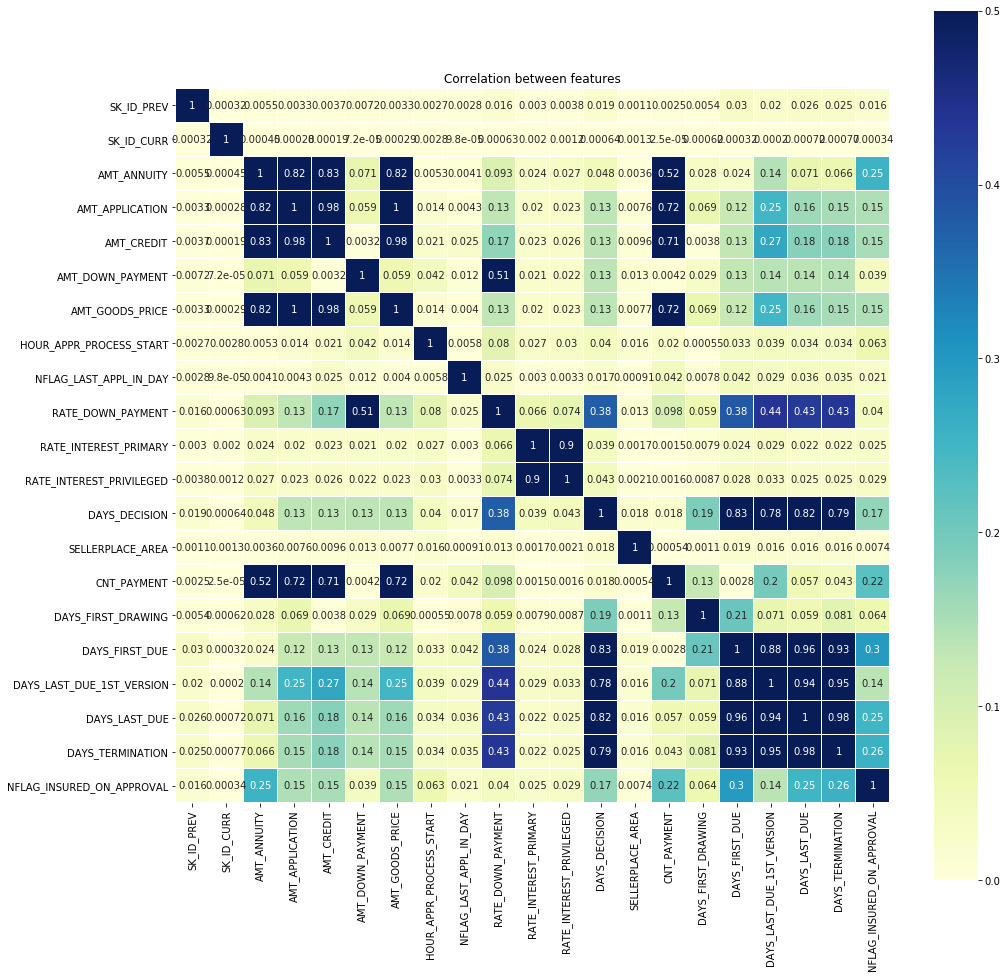

In [23]:
ext_data = data.iloc[:,:-14]
correlations = ext_data.corr()
plt.figure(figsize=(16, 16))

sns.heatmap(np.abs(correlations), vmin=0, vmax=0.5, linewidths=0.05,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features')

Text(0.5, 1, 'Correlation between features')

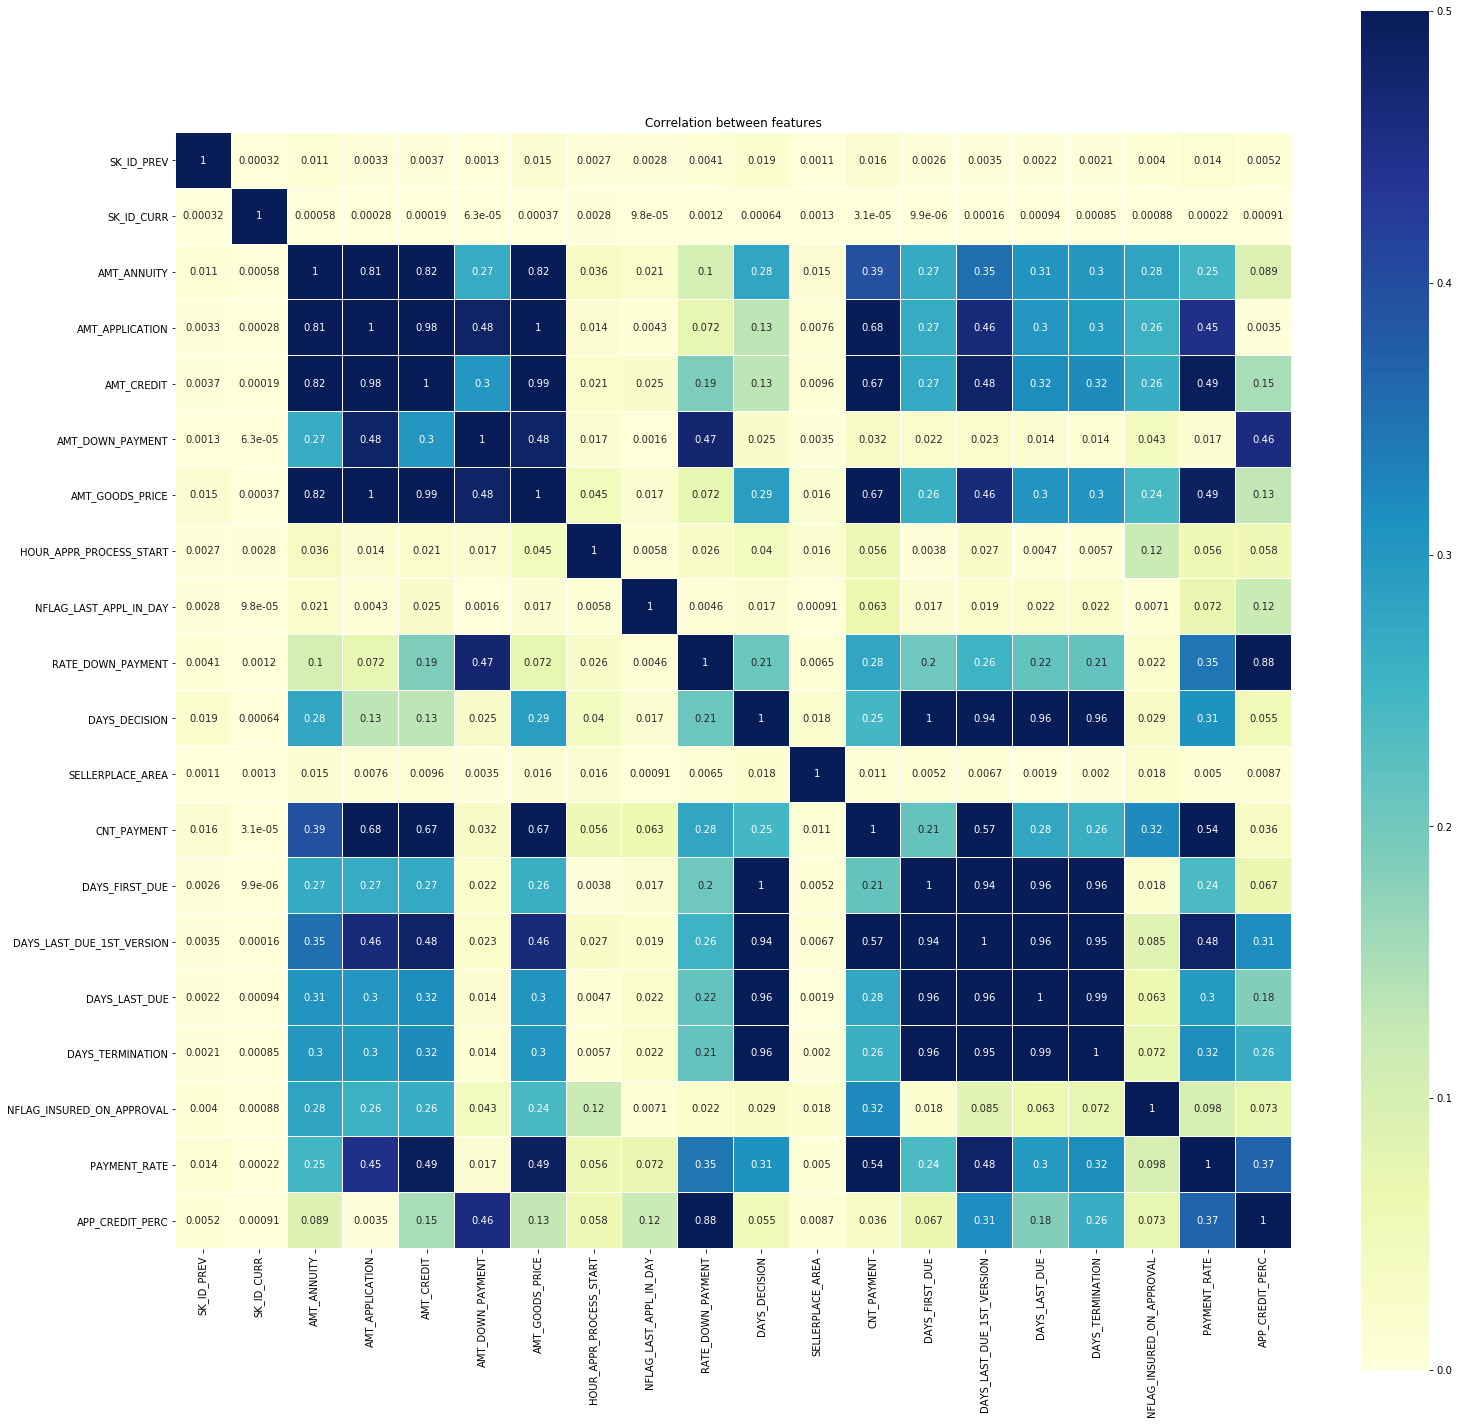

In [72]:
ext_data = data
correlations = ext_data.corr()
plt.figure(figsize=(25, 25))

sns.heatmap(np.abs(correlations), vmin=0, vmax=0.5, linewidths=0.05,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features')